<a href="https://colab.research.google.com/github/ZerXXX0/sales-prediction/blob/main/MLQ_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
import pandas as pd

# Load the CSV files
member_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/member_data.csv")
label_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/train_label_data.csv")
transaction_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/train_transaction_data.csv")

# Merge transaction data with member data
transaction_member_df = pd.merge(transaction_df, member_df, on="MemberID", how="left")

# Merge the above result with label data
final_df = pd.merge(transaction_member_df, label_df, on="MemberID", how="left")

# Save the final merged DataFrame to a CSV file
final_df.to_csv("combined_member_transaction_label.csv", index=False)

print("CSV file saved as combined_member_transaction_label.csv")


CSV file saved as combined_member_transaction_label.csv


In [27]:
df = pd.read_csv("/content/combined_member_transaction_label.csv")

In [28]:
df.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime,JoinDate,DateOfBirth,City,NoOfChild,EldestKidDOB,YoungestKidDOB,next_buy
0,ffd6c035bef03a2c386caf2552148fb2402b0b24,7ef72aa51aecb701dc5c4074480fcdf6,ELANG,27,52,1,NaN,2020-07-01 07:41:00 UTC,2019-12-24,NaN,BEKASI,1,2017-07-31,2017-07-31,0
1,4fadf10aff7e250cc8d63badeaefdf383c0e1c13,577f1b9a093c2cec6398b1118f5d99ab,ALFAMART,22,39,1,290000.0,2020-07-01 07:24:00 UTC,2019-08-29,NaN,JAMBI,2,2017-03-08,2019-01-27,0
2,7299df1aaf47b52017f58dd8e59df1fe37072670,e2ee74f248a74ed886a22f14348fbafd,EKTONG,22,39,1,263500.0,2020-07-01 09:13:00 UTC,2018-06-19,NaN,MAKASAR,2,2017-06-04,2019-04-10,0
3,22dae0e1e8bb87601eabd712721bd249739bc620,cefa8ef7469a8b4e6df3f745d4905000,CITRA,27,52,3,145000.0,2020-07-01 08:28:00 UTC,2019-05-06,NaN,SIDOARJO,1,2016-11-16,2016-11-16,0
4,6a744d5d79e09b0c1646e604db1c4ec65eff73d7,5eecda17ddf06ed9d79f298b13f84785,INDOMARET,27,52,1,165900.0,2020-07-01 07:02:00 UTC,2020-05-05,NaN,SUKABUMI,1,2018-05-22,2018-05-22,0


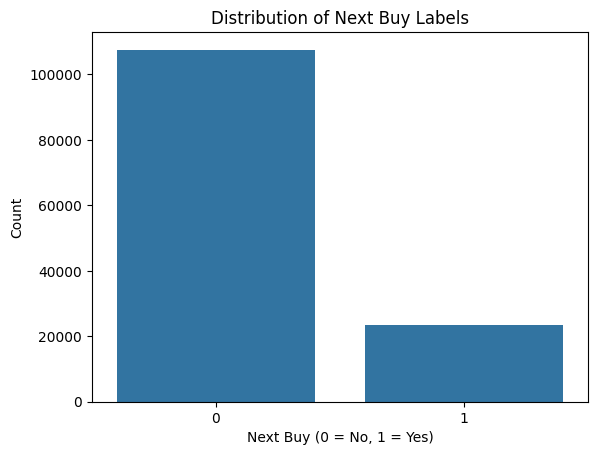

In [29]:
sns.countplot(data=df, x='next_buy')
plt.title('Distribution of Next Buy Labels')
plt.xlabel('Next Buy (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionID        130854 non-null  object 
 1   MemberID             130854 non-null  object 
 2   Source               130854 non-null  object 
 3   FK_PRODUCT_ID        130854 non-null  int64  
 4   FK_PROD_GRAM_ID      130854 non-null  int64  
 5   Qty                  130854 non-null  int64  
 6   PricePerUnit         111681 non-null  float64
 7   TransactionDatetime  130854 non-null  object 
 8   JoinDate             130854 non-null  object 
 9   DateOfBirth          6692 non-null    object 
 10  City                 130854 non-null  object 
 11  NoOfChild            130854 non-null  int64  
 12  EldestKidDOB         130854 non-null  object 
 13  YoungestKidDOB       130854 non-null  object 
 14  next_buy             130854 non-null  int64  
dtypes: float64(1), in

Preprocessing

In [7]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [31]:
import category_encoders as ce

# Define encoder
encoder = ce.TargetEncoder(cols=['Source'])

# Fit encoder on training data only
encoder.fit(df['Source'], df['next_buy'])

# Transform both training and validation using the encoder
df['Source_encoded'] = encoder.transform(df['Source'])

In [32]:
import category_encoders as ce

# Define encoder
encoder = ce.TargetEncoder(cols=['City'])

# Fit encoder on training data only
encoder.fit(df['City'], df['next_buy'])

# Transform both training and validation using the encoder
df['City_encoded'] = encoder.transform(df['City'])

In [33]:
import category_encoders as ce

# Define encoder
encoder = ce.TargetEncoder(cols=['FK_PRODUCT_ID'])

# Fit encoder on training data only
encoder.fit(df['FK_PRODUCT_ID'], df['next_buy'])

# Transform both training and validation using the encoder
df['FK_PRODUCT_ID_encoded'] = encoder.transform(df['FK_PRODUCT_ID'])

In [34]:
import category_encoders as ce

# Define encoder
encoder = ce.TargetEncoder(cols=['FK_PROD_GRAM_ID'])

# Fit encoder on training data only
encoder.fit(df['FK_PROD_GRAM_ID'], df['next_buy'])

# Transform both training and validation using the encoder
df['FK_PROD_GRAM_ID_encoded'] = encoder.transform(df['FK_PROD_GRAM_ID'])

In [35]:
# prompt: encode the YoungestKidDOB column to integer of days since year 2000

import pandas as pd
# Convert 'YoungestKidDOB' to datetime, coercing errors
df['YoungestKidDOB'] = pd.to_datetime(df['YoungestKidDOB'], errors='coerce')

# Define the base date (January 1, 2000)
base_date = pd.to_datetime('2000-01-01')

# Calculate the difference in days and encode
df['YoungestKidDOB_encoded'] = (df['YoungestKidDOB'] - base_date).dt.days

# Display the first few rows with the new column
print(df[['YoungestKidDOB', 'YoungestKidDOB_encoded']].head())

  YoungestKidDOB  YoungestKidDOB_encoded
0     2017-07-31                    6421
1     2019-01-27                    6966
2     2019-04-10                    7039
3     2016-11-16                    6164
4     2018-05-22                    6716


In [36]:
# Drop the 'MemberID' column as it is not needed for modeling
df = df.drop('DateOfBirth', axis=1)
df = df.drop('TransactionDatetime', axis=1)
df = df.drop('JoinDate', axis=1)
df = df.drop('EldestKidDOB', axis=1)
df = df.drop('YoungestKidDOB', axis=1)

In [12]:
df = df.drop('Source', axis=1)
df = df.drop('City', axis=1)

In [20]:
df = df.drop('FK_PRODUCT_ID', axis=1)
df = df.drop('FK_PROD_GRAM_ID', axis=1)

In [37]:
# prompt: make next_buy as the last column instead of YoungestKidDOB_normalized

# Move 'next_buy' to the last column
next_buy_column = df.pop('next_buy')
df['next_buy'] = next_buy_column

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            130854 non-null  object 
 1   MemberID                 130854 non-null  object 
 2   Source                   130854 non-null  object 
 3   FK_PRODUCT_ID            130854 non-null  int64  
 4   FK_PROD_GRAM_ID          130854 non-null  int64  
 5   Qty                      130854 non-null  int64  
 6   PricePerUnit             111681 non-null  float64
 7   City                     130854 non-null  object 
 8   NoOfChild                130854 non-null  int64  
 9   Source_encoded           130854 non-null  float64
 10  City_encoded             130854 non-null  float64
 11  FK_PRODUCT_ID_encoded    130854 non-null  float64
 12  FK_PROD_GRAM_ID_encoded  130854 non-null  float64
 13  YoungestKidDOB_encoded   130854 non-null  int64  
 14  next

Visualization after Preprocessing

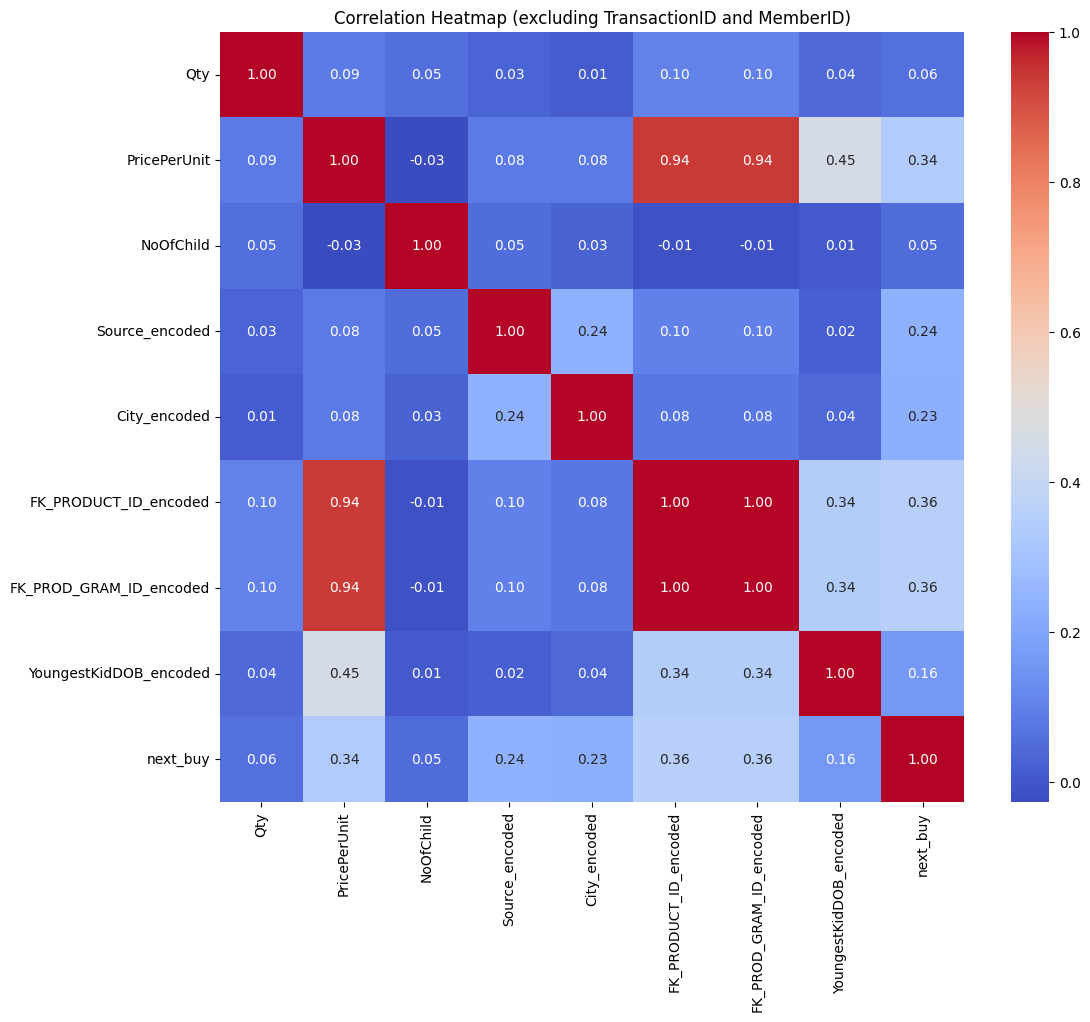

In [40]:
# prompt: make correlation heatmap for each column, except TransactionID and MemberID

import matplotlib.pyplot as plt
# Calculate the correlation matrix, excluding 'TransactionID' and 'MemberID'
correlation_matrix = df.drop(['TransactionID', 'MemberID', 'FK_PRODUCT_ID', 'FK_PROD_GRAM_ID', 'City', 'Source'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (excluding TransactionID and MemberID)')
plt.show()

In [42]:
df.to_csv("new_train_feature_still_existed.csv")

Machine Learning

In [45]:
test_transaction_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/test_transaction_data.csv")
member_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/member_data.csv")

test_df = pd.merge(test_transaction_df, member_df, on="MemberID", how="left")
test_df.to_csv("test_unnormalized.csv", index=False)

In [46]:
test_df = pd.read_csv("/content/test_unnormalized.csv")

In [47]:
test_df.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime,JoinDate,DateOfBirth,City,NoOfChild,EldestKidDOB,YoungestKidDOB
0,5f57263c9b0b2b3e3d7c404510dd59060999115a,c2a630e3d0dc77dac0f63424a9ae1438,ALFAMART,27,52,1,165300.0,2020-07-01 06:09:00 UTC,2019-12-11,NaN,MADIUN,1,2018-07-04,2018-07-04
1,b0c438ae346e794fef83c63a9ce17d6df73da233,3ecf7484c08418953e967a20de37051b,ALFAMART,27,52,1,165300.0,2020-07-01 10:13:00 UTC,2020-01-22,NaN,KEBUMEN,1,2018-12-21,2018-12-21
2,7e2498fc518f0b1489982848a29dc2677ec31367,97bbd6c99a862f20657d9b2b1c77b2c8,ALFAMART,27,52,1,165300.0,2020-07-01 09:27:00 UTC,2019-01-02,1979-10-10,BOGOR,2,2017-10-19,2018-12-17
3,aaa52daf4ca3b8befcbe01362d8219f67293bf45,3ce072ff9c6f2f4b7c95dbc08324a24d,INDOMARET,26,49,1,NaN,2020-07-01 11:04:00 UTC,2019-08-13,NaN,PALEMBANG,1,2017-06-17,2017-06-17
4,4ec62459fb8d83062284e32f3c7b5af125d242b1,ab0b0de2a1c85a40b5d58644aef745c0,ALFAMART,26,49,2,85500.0,2020-07-01 09:24:00 UTC,2019-04-06,NaN,SURABAYA,2,2010-06-18,2015-05-14


In [48]:
# prompt: encode the YoungestKidDOB column to integer of days since year 2000

import pandas as pd
# Convert 'YoungestKidDOB' to datetime, coercing errors
test_df['YoungestKidDOB'] = pd.to_datetime(test_df['YoungestKidDOB'], errors='coerce')

# Define the base date (January 1, 2000)
base_date = pd.to_datetime('2000-01-01')

# Calculate the difference in days and encode
test_df['YoungestKidDOB_encoded'] = (test_df['YoungestKidDOB'] - base_date).dt.days

# Display the first few rows with the new column
print(test_df[['YoungestKidDOB', 'YoungestKidDOB_encoded']].head())

  YoungestKidDOB  YoungestKidDOB_encoded
0     2018-07-04                    6759
1     2018-12-21                    6929
2     2018-12-17                    6925
3     2017-06-17                    6377
4     2015-05-14                    5612


In [49]:
# prompt: make next_buy as the last column instead of YoungestKidDOB_normalized

# Move 'next_buy' to the last column
next_buy_column = df.pop('next_buy')
df['next_buy'] = next_buy_column

In [51]:
# Drop the 'MemberID' column as it is not needed for modeling
test_df = test_df.drop('DateOfBirth', axis=1)
test_df = test_df.drop('TransactionDatetime', axis=1)
test_df = test_df.drop('JoinDate', axis=1)
test_df = test_df.drop('EldestKidDOB', axis=1)
test_df = test_df.drop('YoungestKidDOB', axis=1)

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21098 entries, 0 to 21097
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TransactionID           21098 non-null  object 
 1   MemberID                21098 non-null  object 
 2   Source                  21098 non-null  object 
 3   FK_PRODUCT_ID           21098 non-null  int64  
 4   FK_PROD_GRAM_ID         21098 non-null  int64  
 5   Qty                     21098 non-null  int64  
 6   PricePerUnit            17917 non-null  float64
 7   City                    21098 non-null  object 
 8   NoOfChild               21098 non-null  int64  
 9   YoungestKidDOB_encoded  21098 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.6+ MB


In [53]:
test_df.to_csv("new_test_feature_still_existed.csv")

In [57]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("new_train_feature_still_existed.csv")
test_df = pd.read_csv("new_test_feature_still_existed.csv")

# Target column
target = 'next_buy'

# Target encoding using mean for all categorical columns
city_mean = train_df.groupby('City')[target].mean()
source_mean = train_df.groupby('Source')[target].mean()
prod_id_mean = train_df.groupby('FK_PRODUCT_ID')[target].mean()
prod_gram_id_mean = train_df.groupby('FK_PROD_GRAM_ID')[target].mean()

# Apply mapping to test set
test_df['City_encoded'] = test_df['City'].map(city_mean)
test_df['Source_encoded'] = test_df['Source'].map(source_mean)
test_df['FK_PRODUCT_ID_encoded'] = test_df['FK_PRODUCT_ID'].map(prod_id_mean)
test_df['FK_PROD_GRAM_ID_encoded'] = test_df['FK_PROD_GRAM_ID'].map(prod_gram_id_mean)

# Save updated test set
test_df.to_csv("updated_test_with_all_encoded.csv", index=False)
print("✅ Test set saved as 'updated_test_with_all_encoded.csv'")


✅ Test set saved as 'updated_test_with_all_encoded.csv'


In [58]:
test_df = pd.read_csv("/content/updated_test_with_all_encoded.csv")

In [59]:
test_df.head()

,Unnamed: 0,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,City,NoOfChild,YoungestKidDOB_encoded,City_encoded,Source_encoded,FK_PRODUCT_ID_encoded,FK_PROD_GRAM_ID_encoded
0,0,5f57263c9b0b2b3e3d7c404510dd59060999115a,c2a630e3d0dc77dac0f63424a9ae1438,ALFAMART,27,52,1,165300.0,MADIUN,1,6759,0.133523,0.135032,0.016952,0.016976
1,1,b0c438ae346e794fef83c63a9ce17d6df73da233,3ecf7484c08418953e967a20de37051b,ALFAMART,27,52,1,165300.0,KEBUMEN,1,6929,0.022044,0.135032,0.016952,0.016976
2,2,7e2498fc518f0b1489982848a29dc2677ec31367,97bbd6c99a862f20657d9b2b1c77b2c8,ALFAMART,27,52,1,165300.0,BOGOR,2,6925,0.173841,0.135032,0.016952,0.016976
3,3,aaa52daf4ca3b8befcbe01362d8219f67293bf45,3ce072ff9c6f2f4b7c95dbc08324a24d,INDOMARET,26,49,1,NaN,PALEMBANG,1,6377,0.130226,0.205367,0.010196,0.010148
4,4,4ec62459fb8d83062284e32f3c7b5af125d242b1,ab0b0de2a1c85a40b5d58644aef745c0,ALFAMART,26,49,2,85500.0,SURABAYA,2,5612,0.192486,0.135032,0.010196,0.010148


In [64]:
test_df = test_df.drop('FK_PRODUCT_ID', axis=1)
test_df = test_df.drop('FK_PROD_GRAM_ID', axis=1)
test_df = test_df.drop('Source', axis=1)
test_df = test_df.drop('City', axis=1)

In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21098 entries, 0 to 21097
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            21098 non-null  object 
 1   MemberID                 21098 non-null  object 
 2   Qty                      21098 non-null  int64  
 3   PricePerUnit             17917 non-null  float64
 4   NoOfChild                21098 non-null  int64  
 5   YoungestKidDOB_encoded   21098 non-null  int64  
 6   City_encoded             21066 non-null  float64
 7   Source_encoded           20914 non-null  float64
 8   FK_PRODUCT_ID_encoded    21098 non-null  float64
 9   FK_PROD_GRAM_ID_encoded  21098 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.6+ MB


In [66]:
test_df = test_df.drop('Unnamed: 0', axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            130854 non-null  object 
 1   MemberID                 130854 non-null  object 
 2   Source                   130854 non-null  object 
 3   FK_PRODUCT_ID            130854 non-null  int64  
 4   FK_PROD_GRAM_ID          130854 non-null  int64  
 5   Qty                      130854 non-null  int64  
 6   PricePerUnit             111681 non-null  float64
 7   City                     130854 non-null  object 
 8   NoOfChild                130854 non-null  int64  
 9   Source_encoded           130854 non-null  float64
 10  City_encoded             130854 non-null  float64
 11  FK_PRODUCT_ID_encoded    130854 non-null  float64
 12  FK_PROD_GRAM_ID_encoded  130854 non-null  float64
 13  YoungestKidDOB_encoded   130854 non-null  int64  
 14  next

In [69]:
df = df.drop('FK_PRODUCT_ID', axis=1)
df = df.drop('FK_PROD_GRAM_ID', axis=1)
df = df.drop('Source', axis=1)
df = df.drop('City', axis=1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            130854 non-null  object 
 1   MemberID                 130854 non-null  object 
 2   Qty                      130854 non-null  int64  
 3   PricePerUnit             111681 non-null  float64
 4   NoOfChild                130854 non-null  int64  
 5   Source_encoded           130854 non-null  float64
 6   City_encoded             130854 non-null  float64
 7   FK_PRODUCT_ID_encoded    130854 non-null  float64
 8   FK_PROD_GRAM_ID_encoded  130854 non-null  float64
 9   YoungestKidDOB_encoded   130854 non-null  int64  
 10  next_buy                 130854 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 11.0+ MB


In [71]:
df.to_csv("train_final.csv")
test_df.to_csv("test_final.csv")

In [72]:
train_df = pd.read_csv("/content/train_final.csv")
test_df = pd.read_csv("/content/test_final.csv")

Machine Learning (Train)